In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

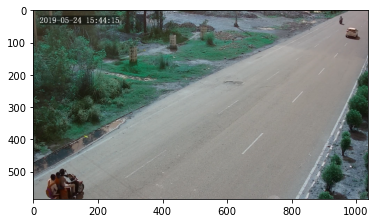

In [26]:
img_path = r"/home/sahil/Downloads/Quantum/image.png"
img1 = cv2.imread(img_path)
plt.imshow(img1)

In [27]:
# this function will conver RGB image into greyscale image as greyscale image are easy to handle and faster
# computation
def grey(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)



In [28]:
# this function help to reduce noise in the image 
# Canny is sensitive to noise hence we are performing this step

def gauss(image):
    return cv2.GaussianBlur(image,(5,5),0)
## (5,5) kernel size which will help to reduce noise
## 0 ie sigma define standard deviation. 

In [29]:
# this function detect edges in the image
# (50-150) is the range between gradient are selected 
def canny(image,x,y):
    edges = cv2.Canny(image,x,y)
    return edges

In [31]:
# after getting edges of interest we need to isolate edges that correspond to lane

def region(image):
    height, width = image.shape
    triangle = np.array([
        [(150,height),(824,87),(1036,151),(844, height)]
    ])
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask,triangle,255)
    mask = cv2.bitwise_and(image,mask)
    return mask

In [32]:
def draw_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
 
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (255,0 , 0), 2)
 
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

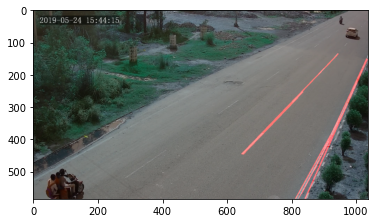

In [33]:
copy = np.copy(img1)
grey = grey(copy)
gaus = gauss(grey)
edges = canny(gaus,50,150)
# isolated = region(edges)
isolated = region(edges)
# lines = cv2.HoughLinesP(isolated, 1, np.pi/180, 30, maxLineGap=200)
lines = cv2.HoughLinesP(isolated, 1, np.pi/180, 50, np.array([]), minLineLength=10, maxLineGap=200)

image_with_lines = draw_lines(img1, lines)
plt.imshow(image_with_lines)
plt.show()

In [24]:
video = r"/home/sahil/Downloads/Quantum/video.mp4"
cap = cv2.VideoCapture(video)
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        
        gaus = gauss(frame)
        edges = canny(gaus,50,150)
        # isolated = region(edges)
        isolated = region(edges)
        # lines = cv2.HoughLinesP(isolated, 1, np.pi/180, 30, maxLineGap=200)
        lines = cv2.HoughLinesP(isolated, 1, np.pi/180, 50, np.array([]), minLineLength=10, maxLineGap=200)

        image_with_lines = draw_lines(frame, lines)
        cv2.imshow("frame",image_with_lines)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
#         print('hii')
        break
cap.release()
cv2.destroyAllWindows()